# K-Fold cross validation
Using the [iris dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) from scikit-learn.

In [17]:
# Set up Jupyter notebook to display plots inline
%matplotlib notebook

# Import Numpy and Matplotlib pyplot
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
from sklearn import datasets
iris = datasets.load_iris()

In [18]:
X = iris.data
y = iris.target

# Split into training and test sets
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Simplify the data by keeping only the first 2 variables
X = X[:, :2]

### Try a variety of value for number of neighbors and see how the accuracy of the model compares when calculated using train/test split or using K-fold cross validation

In [19]:
from sklearn.neighbors import KNeighborsClassifier

max_neighbours = 100

accuracy = np.zeros((max_neighbours-1, 3))

for number_neighbors in range(1,max_neighbours):
    knn = KNeighborsClassifier(n_neighbors = number_neighbors)
    knn.fit(X_train, y_train);

    # K-fold cross validation
    scores = cross_val_score(knn,      # The model
                             X,
                             y,
                             cv=10      # The number of folds
                            )

    # Save the accuracy figures
    accuracy[number_neighbors-1, 0] = number_neighbors
    accuracy[number_neighbors-1, 1] = scores.mean()
    accuracy[number_neighbors-1, 2] = knn.score(X_test, y_test)


### Plot the accuracy results

<IPython.core.display.Javascript object>


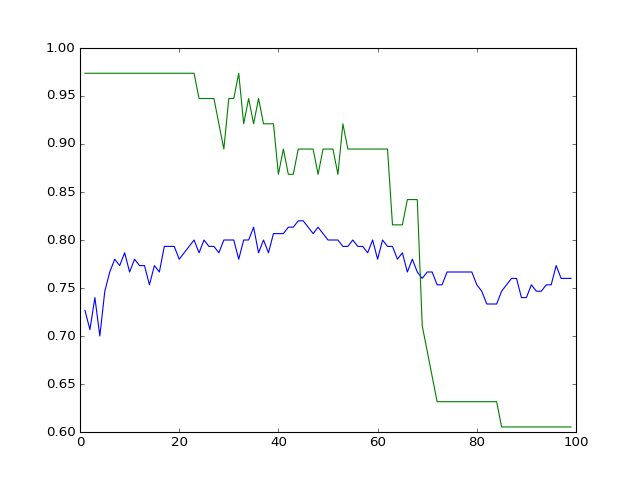

In [20]:
plt.figure()

plt.plot(accuracy[:,0], accuracy[:,1]) # blue line: K-fold cross validation accuracy
plt.plot(accuracy[:,0], accuracy[:,2]); # green line: accuracy using train / test split


There's quite a difference here in accuracy according to train/test split and K-fold validation. Let's look at some graphs for number_neighbours = 1 and 70

In [21]:
def plot_boundary(knn):
    '''
    Plot the points and decision boundary for a K-neighbours classification model
    
    Args:
        knn: the model
    '''
    # First find the min and max values of each feature
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid
    h=(x_max-x_min)/500

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    xx_yy_grid = np.c_[xx.ravel(), yy.ravel()] 

    # Predict the model outcome for each of those grid values
    Z = knn.predict(xx_yy_grid)

    # Reshape the output into a suitable form for plotting
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set3)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
                edgecolor='k', s=100)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

<IPython.core.display.Javascript object>


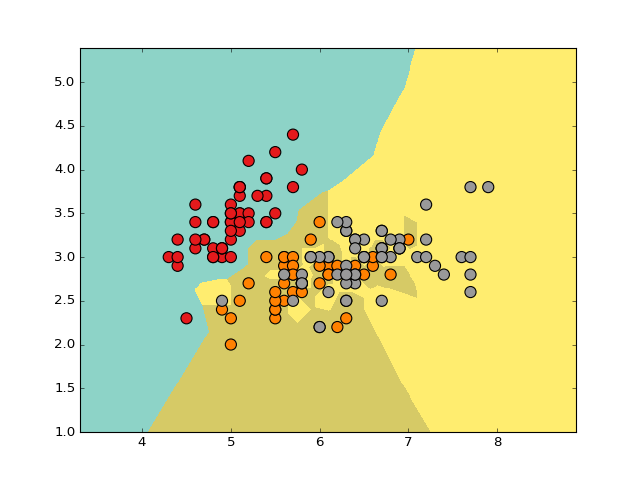

In [22]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y);
plot_boundary(knn)

<IPython.core.display.Javascript object>


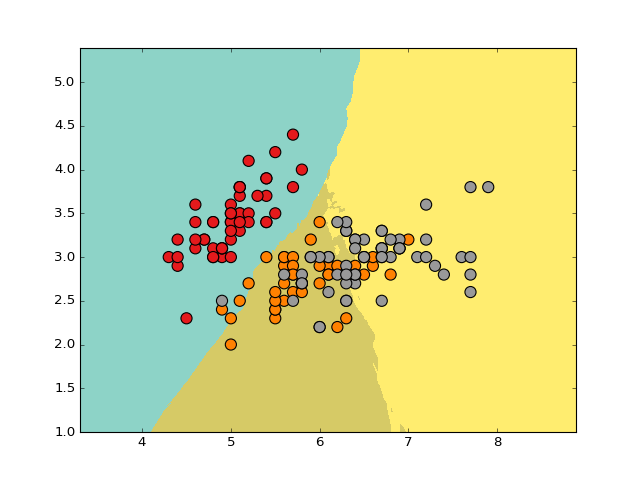

In [23]:
knn = KNeighborsClassifier(n_neighbors = 70)
knn.fit(X, y);
plot_boundary(knn);